# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
path = "/Users/saideepbunny/Projects/Application_Ranking_System"

## Reading the data

In [3]:
df = pd.concat([pd.read_csv(f"{path}/data/synthetic_data/synthetic_data_v2/synthetic_jd_resume_set1_1.csv"),
                pd.read_csv(f"{path}/data/synthetic_data/synthetic_data_v2/synthetic_jd_resume_set1_2.csv"),
                pd.read_csv(f"{path}/data/synthetic_data/synthetic_data_v2/synthetic_jd_resume_set2_1.csv"),
                pd.read_csv(f"{path}/data/synthetic_data/synthetic_data_v2/synthetic_jd_resume_set2_2.csv")]).reset_index(drop=True)
df

,id,job_title,company,job_skills,job_summary,category,resume_text
0,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Complete Mismatch,**Jennifer Oneal**\n*+1 (555) 555-5555* *|* *j...
1,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Underwhelming,**Christina Padilla DVM**\n\n*Email: christina...
2,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Good Fit,**Andrew Kirby**\n*+44 00000 000000* *|* *andr...
3,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Overqualified,**Erin Hicks**\n*+1 (555) 555-5555* *|* *erin....
4,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Complete Mismatch,**Randy Smith**\n*+1 (123) 456-7890* *|* *rand...
...,...,...,...,...,...,...,...
3995,568816,Test Engineer,Micross Components,"Semiconductor Testing, Automated Test Equipmen...","Job Summary:\nPerforms LAT testing, builds bur...",Overqualified,# Darren Roberts\n\n*Email*: darren.roberts@em...
3996,452512,Test Engineer,SEGULA Technologies,"Data acquisition, Data processing, Mechanical ...",Company Description\nMUST be authorized to wor...,Complete Mismatch,**Lisa Wright**\n*+1 (111) 111-1111* *|* *lisa...
3997,452512,Test Engineer,SEGULA Technologies,"Data acquisition, Data processing, Mechanical ...",Company Description\nMUST be authorized to wor...,Underwhelming,"# Daniel Meza\n\n*Greensboro, NC* *·* *(555) 5..."
3998,452512,Test Engineer,SEGULA Technologies,"Data acquisition, Data processing, Mechanical ...",Company Description\nMUST be authorized to wor...,Good Fit,"# William Torres\n\n*Greensboro, NC* *|* *will..."


In [4]:
df['id'].nunique()

500

In [5]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 4000
Number of columns in the dataset: 7


### Overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4000 non-null   int64 
 1   job_title    4000 non-null   object
 2   company      4000 non-null   object
 3   job_skills   4000 non-null   object
 4   job_summary  4000 non-null   object
 5   category     4000 non-null   object
 6   resume_text  4000 non-null   object
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


### Null value report

In [7]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [8]:
null_value_report(df)

,column,Count,Percentage
0,id,0,0.0
1,job_title,0,0.0
2,company,0,0.0
3,job_skills,0,0.0
4,job_summary,0,0.0
5,category,0,0.0
6,resume_text,0,0.0


## Categorizing columns

In [9]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [10]:
get_cardinality(df)

,column,Count,Unique Percentage
0,id,500,12.50
1,job_title,50,1.25
2,company,452,11.30
3,job_skills,500,12.50
4,job_summary,496,12.40
5,category,4,0.10
6,resume_text,4000,100.00


In [11]:
ignore_columns = ["id"]
numerical_columns = []

categorical_columns = ["category", "job_title", "company"]
text_columns = ["job_skills", "job_summary", "resume_text"]

In [12]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [13]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 0
Number of Categorical columns: 3
Number of Text columns: 3


## EDA

### Numerical columns

In [14]:
#There are no numerical fields

#### Histograms

In [15]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

### Categorical columns

#### Null value report

In [16]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,category,0,0.0
1,job_title,0,0.0
2,company,0,0.0


#### Statistics

In [17]:
df[categorical_columns].describe(include=['object'])

,category,job_title,company
count,4000,4000,4000
unique,4,50,452
top,Complete Mismatch,Audit Manager,Jobs for Humanity
freq,1000,80,40


#### Count plots

In [18]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_86572/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


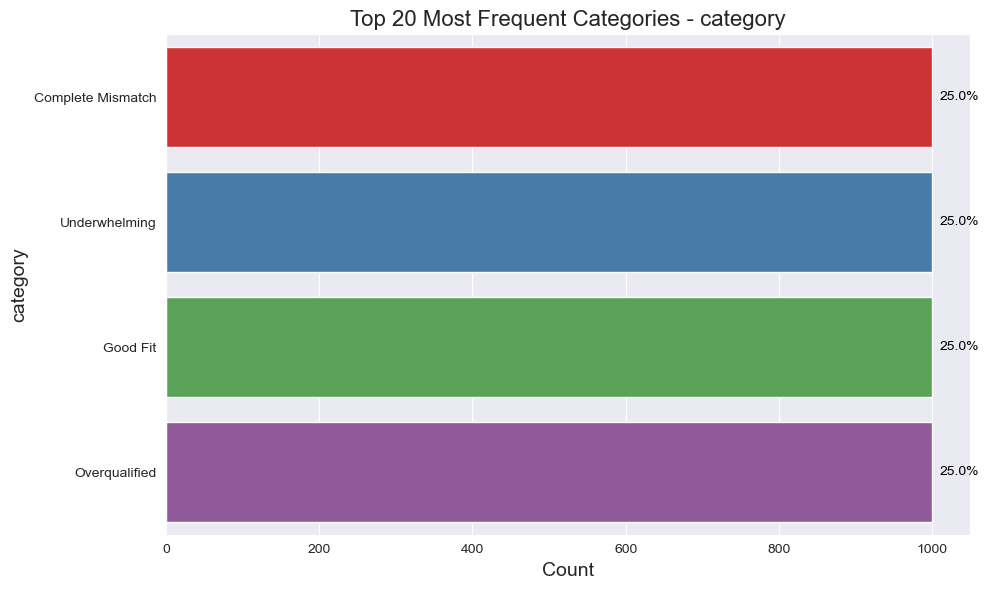

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_86572/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


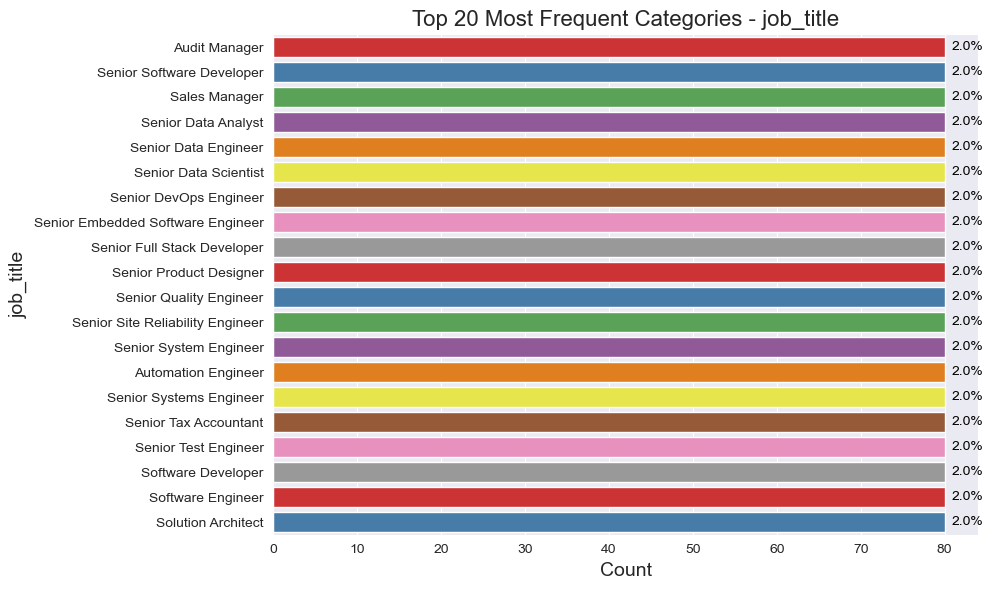

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_86572/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


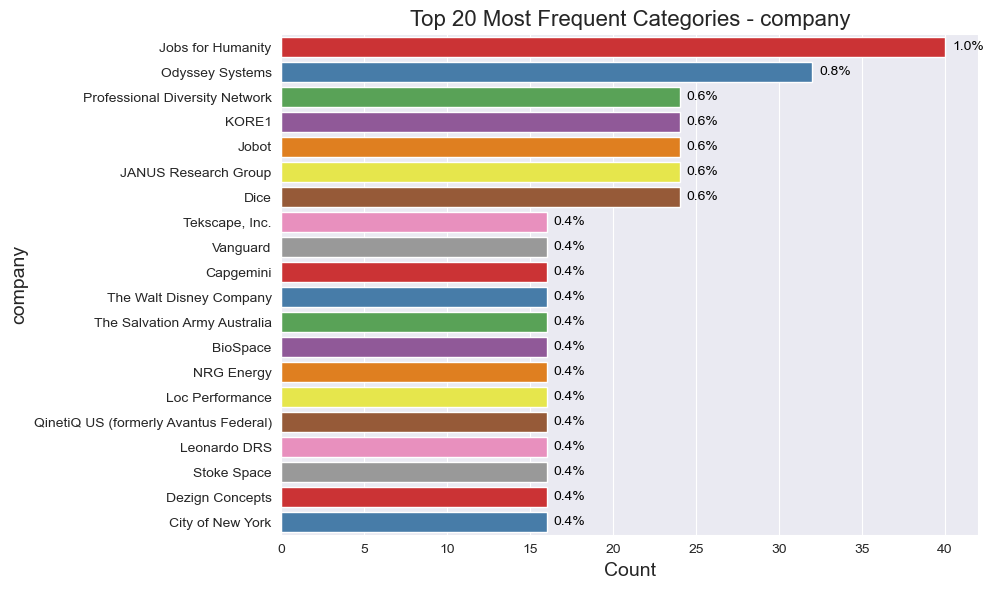

In [19]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [20]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,0,0.0
1,job_summary,0,0.0
2,resume_text,0,0.0


#### Text lengths

In [21]:
temp = df[text_columns+['category']].fillna("").copy()
for i in text_columns:
    temp[f"{i}_len"] = temp[i].apply(lambda x: len(x))
    
temp[text_columns + [f"{i}_len" for i in text_columns]]

,job_skills,job_summary,resume_text,job_skills_len,job_summary_len,resume_text_len
0,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Jennifer Oneal**\n*+1 (555) 555-5555* *|* *j...,404,6142,2071
1,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Christina Padilla DVM**\n\n*Email: christina...,404,6142,2572
2,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Andrew Kirby**\n*+44 00000 000000* *|* *andr...,404,6142,2497
3,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,**Erin Hicks**\n*+1 (555) 555-5555* *|* *erin....,404,6142,3232
4,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",**Randy Smith**\n*+1 (123) 456-7890* *|* *rand...,776,5769,2352
...,...,...,...,...,...,...
3995,"Semiconductor Testing, Automated Test Equipmen...","Job Summary:\nPerforms LAT testing, builds bur...",# Darren Roberts\n\n*Email*: darren.roberts@em...,883,3510,3711
3996,"Data acquisition, Data processing, Mechanical ...",Company Description\nMUST be authorized to wor...,**Lisa Wright**\n*+1 (111) 111-1111* *|* *lisa...,327,3301,2064
3997,"Data acquisition, Data processing, Mechanical ...",Company Description\nMUST be authorized to wor...,"# Daniel Meza\n\n*Greensboro, NC* *·* *(555) 5...",327,3301,2942
3998,"Data acquisition, Data processing, Mechanical ...",Company Description\nMUST be authorized to wor...,"# William Torres\n\n*Greensboro, NC* *|* *will...",327,3301,3327


In [22]:
temp["num_of_skills"] = temp["job_skills"].apply(lambda x: len(x.split(",")))

#### Text length statistics

In [23]:
temp[[f"{i}_len" for i in text_columns] + ["num_of_skills"]].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,job_skills_len,job_summary_len,resume_text_len,num_of_skills
count,4000.00,4000.00,4000.00,4000.00
mean,569.32,5387.62,2893.93,30.60
std,295.50,964.11,617.35,13.96
min,130.00,2885.00,1605.00,9.00
5%,225.85,3691.20,2108.00,14.00
25%,366.00,4679.50,2432.00,21.00
50%,500.50,5482.50,2754.00,28.00
75%,685.25,6164.50,3240.25,37.00
95%,1160.10,6831.00,4150.15,55.05
max,2015.00,6992.00,5612.00,130.00


#### Text length histograms

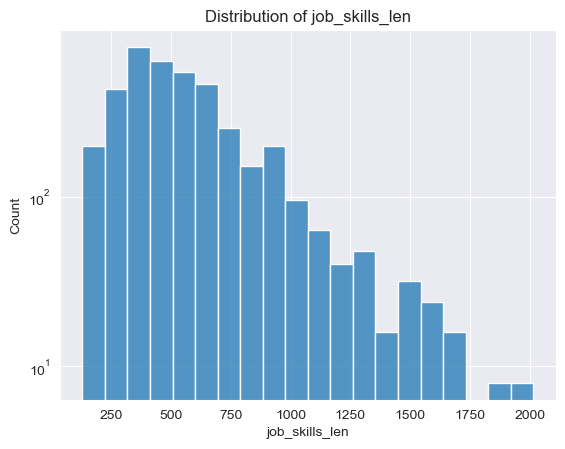

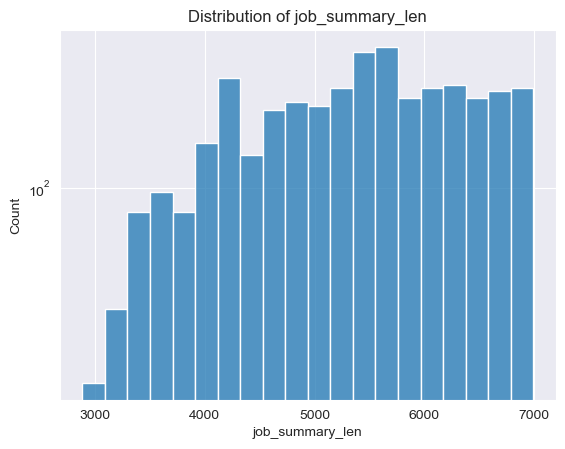

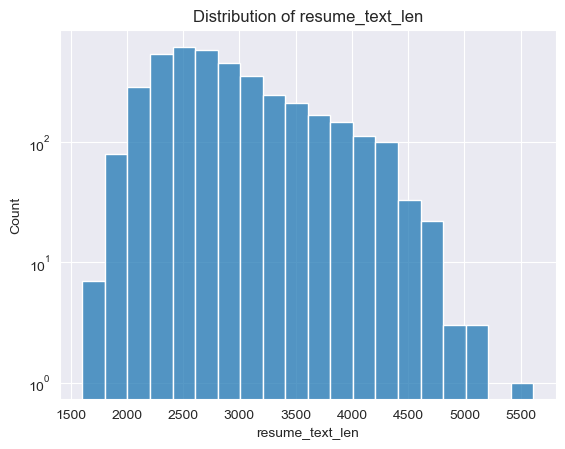

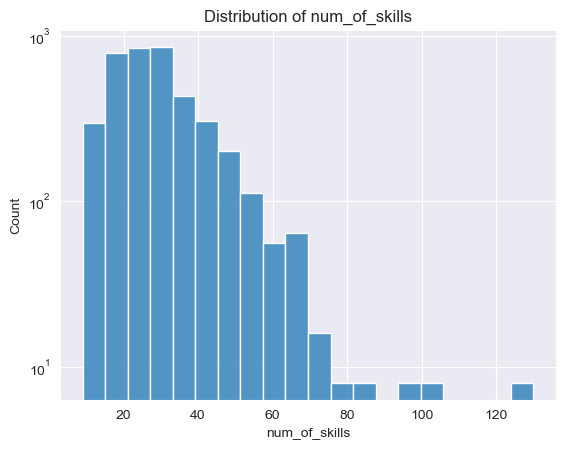

In [24]:
for i in [f"{i}_len" for i in text_columns] + ["num_of_skills"]:
    plot_histogram(temp, i)

## WordClouds

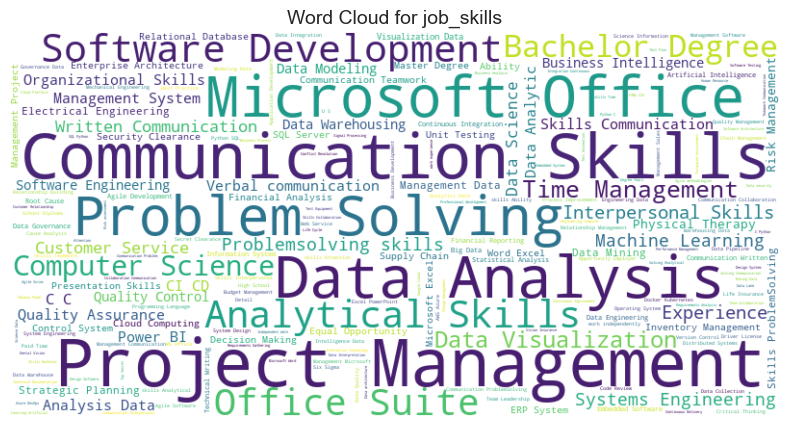

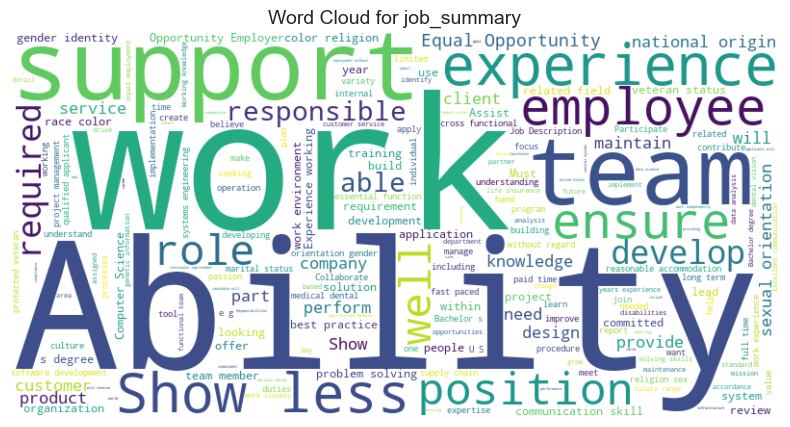

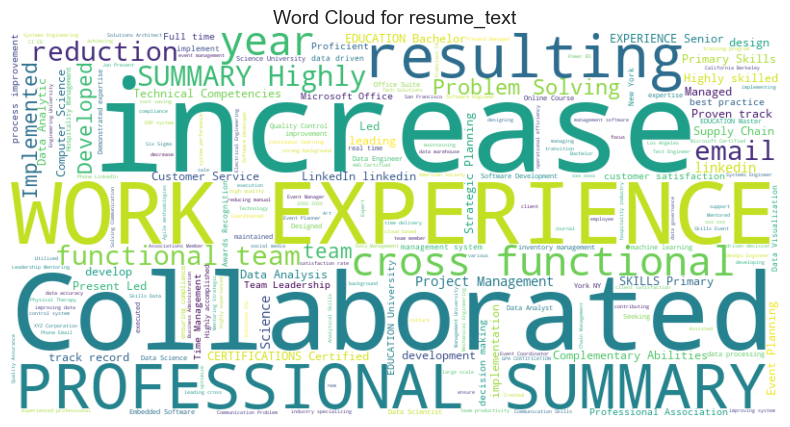

In [25]:
for col in text_columns:
    text_data = " ".join(temp[col])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axes
    plt.title(f"Word Cloud for {col}", fontsize=14)
    plt.show()

## Analyzing Resume text

### No professional summary

In [26]:
no_prof_sum = df[~df['resume_text'].str.contains("Summary", case=False)].copy()
print("Number of resumes without professional summary:", no_prof_sum.shape[0])

Number of resumes without professional summary: 33


In [27]:
for i in range(no_prof_sum.shape[0]):
    print("Fit category:", no_prof_sum.iloc[i]['category'])
    print("Resume:\n", no_prof_sum.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 # GARY FRANK

*Washington, DC* *|* *garyfrank@email.com* *|* *202-xxx-xxxx* *|* *linkedin.com/in/gary-frank*

**DATA SCIENTIST**

*Highly skilled Data Scientist with 6+ years of experience in quantitative analysis, data visualization, and project management. Expertise in R, Python, and Tableau. Proven track record of delivering actionable insights and driving strategic decisions in international development and national security sectors.*

**SKILLS**

*Data Science, Statistical Methods, Data Analysis, Tableau, Visualization, R, Python, Programming, Quantitative Analysis, Project Management, Strategic Planning, Problem Solving, Requirements Gathering, Stakeholder Management, Data Management, Data Warehousing, Data Mining, Data Visualization, Decision Making, Communication, Collaboration, Team Work, Flexibility, Adaptability, Innovation, Leadership, Growth, Development, Benefits, Compensation, WorkLife Balance, Training, Tuition Reimbursement, Diversity, I

We can see that the resumes generated have professional summary present without a title

### No Skills

In [28]:
print("Number of resumes without skills word:", df[~df['resume_text'].str.contains("Skills", case=False)].shape[0])

Number of resumes without skills word: 0


All resumes have skills word, which is most probably skills section

### No Projects

In [29]:
print("Number of resumes without Projects word:", df[~df['resume_text'].str.contains("Projects", case=False)].shape[0])

no_proj = df[~df['resume_text'].str.contains("Projects", case=False)].copy()
no_proj

Number of resumes without Projects word: 814


,id,job_title,company,job_skills,job_summary,category,resume_text
0,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Complete Mismatch,**Jennifer Oneal**\n*+1 (555) 555-5555* *|* *j...
3,339382,Audit Manager,ACCA Careers,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,Overqualified,**Erin Hicks**\n*+1 (555) 555-5555* *|* *erin....
6,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Good Fit,"**SHEILA MCMILLAN**\n\n*Los Angeles, CA* *|* *..."
7,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Overqualified,**David King**\n\n*Email: dking@email.com* | *...
14,561971,Audit Manager,Jobot,"Audit, Leadership, Client Relationships, Strat...",Want to learn more about this role and Jobot? ...,Good Fit,**Monica Garza**\n*Phone: (123) 456-7890* | *E...
...,...,...,...,...,...,...,...
3971,498223,Test Engineer,Kubota Corporation,"Mechanical Engineering, Construction Equipment...",Construction Equipment Test Engineer 1\nKubota...,Overqualified,"# MICHELLE MARSH\n\n*Salina, KS | (555) 555-55..."
3979,1175049,Test Engineer,Evertz,"Automated test stations, ATE stations, Labview...","As a member of the Test Department, you will b...",Overqualified,**Eddie Oneal**\n*+1 (xxx) xxx- xxxx* *|* *edd...
3983,14991,Test Engineer,Stoke Space,"Fluid systems, Mechanical systems, Instrumenta...",A thriving economy in space is needed to make ...,Overqualified,# Yvette Smith\n\n*Email*: yvettesmith@email.c...
3992,568816,Test Engineer,Micross Components,"Semiconductor Testing, Automated Test Equipmen...","Job Summary:\nPerforms LAT testing, builds bur...",Complete Mismatch,**ERIN GIBBS**\n\n*PH: 123-456-7890* *Email: e...


In [30]:
for i in range(10):
    print("Fit category:", no_proj.iloc[i]['category'])
    print("Resume:\n", no_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Complete Mismatch
Resume:
 **Jennifer Oneal**
*+1 (555) 555-5555* *|* *joneal@email.com* *|* *linkedin.com/in/joneal*

**Professional Summary**

Highly skilled professional with 10+ years of experience in the fashion industry, specializing in design, merchandising, and retail management. Proven track record in leading creative teams, driving sales growth, and implementing successful marketing strategies. Seeking to leverage extensive background in a new challenge.

**Skills**

*Primary Skills*: Fashion Design, Merchandising, Retail Management, Team Leadership, Sales Strategy, Marketing Campaigns

*Technical Competencies*: Adobe Creative Suite (Expert), Fashion GPS (Proficient), MS Office (Proficient)

*Complementary Abilities*: Project Management, Cross-Functional Collaboration, Trend Forecasting, Visual Merchandising

**Work Experience**

*Fashion Director, Chic Boutique (2018-Present)*

- Oversaw design and merchandising for 10+ store locations, increasing sales by 15% 

Even though there are no Projects for these resumes, the resume has rich content in other sections (Except for some).

#### No work experience

In [31]:
#Check how many of these dont have any other sections
no_exp_proj = no_proj[~no_proj['resume_text'].str.contains("Work Experience", case=False)].copy()
no_exp_proj

,id,job_title,company,job_skills,job_summary,category,resume_text
6,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Good Fit,"**SHEILA MCMILLAN**\n\n*Los Angeles, CA* *|* *..."
123,248807,Business Intelligence Analyst,Jobs for Humanity,"Data Analytics, Reporting, PSaS, SQL, Power BI...","Job Description\nMcKesson is an impact-driven,...",Overqualified,"# Jennifer Evans\n\n*New York, NY* *|* *+1 (xx..."
142,248704,Business Intelligence Analyst,The Daily Wire,"Data Analytics, Business Intelligence, Data Vi...",You’re not applying for just another job. Or s...,Good Fit,"**Kathleen Roach**\n*+1 (xxx) xxx-xxx*, *kathl..."
551,1202661,Facilities Manager,JLL,"Facilities Management, Stakeholder Management,...",Objective of Role\nThe Facilities Manager (FM)...,Overqualified,"# KRISTEN MORRIS\n\n*New York, NY* *|* *Linked..."
1526,39339,Facilities Manager,International High School of New Orleans,"Facilities management, HVAC, Electrical, Plumb...",Job Description\nUnder the direction of the Di...,Good Fit,"# Tara Ortega\n\n*New Orleans, LA* *|* *504-xx..."
1618,483519,HR Manager,Blue Ridge Area Food Bank,"Talent acquisition, Diversity Equity and Inclu...","Do you have a passion for developing, supporti...",Good Fit,**Bryan Pitts**\n*555-555-5555 | bryan.pitts@e...
1927,202785,Quality Assurance Engineer,Sky Solutions,"Test Automation, Manual Testing, Test Strategi...",The Quality Assurance Engineer provides testin...,Overqualified,# *John Holloway*\n**(999) 999-9999** | **john...
2426,558098,Senior Quality Engineer,Evotec,"Technical Writing, Pharmaceutical Industry, Qu...",Just-Evotec Biologics (JEB)\nis seeking a high...,Good Fit,"**Juan Berry**\n*Boston, MA* | *+1 (123) 456-7..."
3179,381036,Senior Data Engineer,NBCUniversal,"Data Engineering, Data Pipelines, Data Product...",Company Description\nNBCUniversal owns and ope...,Overqualified,"# CARL HOPKINS\n\n*New York, NY* | *carl.hopki..."


In [32]:
for i in range(no_exp_proj.shape[0]):
    print("Fit category:", no_exp_proj.iloc[i]['category'])
    print("Resume:\n", no_exp_proj.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 **SHEILA MCMILLAN**

*Los Angeles, CA* *|* *(555) 555-5555* *|* *smcmillan@email.com* *|* *linkedin.com/in/sheila-mcmillan*

**PROFESSIONAL SUMMARY**

Highly skilled Audit Manager with 7+ years of experience in providing financial statement auditing services and assurance services to middle-market clients. Proven track record of leading and supervising teams, delivering exceptional client service, and driving business growth. Expertise in risk assessment, internal controls, and financial statement guidance.

**SKILLS**

*Accounting, Auditing, Assurance services, Financial statement guidance, Business recommendations, Internal controls, Risk assessment, Management, Leadership, Supervision, Client service, Communication, Analytical skills, Project management, Microsoft Suite, Software skills, CPA*

**EXPERIENCE**

**Audit Manager** | *Baker Tilly US, LLP* | *Los Angeles, CA* | *Jan. 2020 - Present*

- Manage all aspects of audit engagements for various ind

### No work experience

In [33]:
no_exp = df[~df['resume_text'].str.contains("Work Experience", case=False)]
no_exp

,id,job_title,company,job_skills,job_summary,category,resume_text
6,70598,Audit Manager,Baker Tilly US,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",Good Fit,"**SHEILA MCMILLAN**\n\n*Los Angeles, CA* *|* *..."
123,248807,Business Intelligence Analyst,Jobs for Humanity,"Data Analytics, Reporting, PSaS, SQL, Power BI...","Job Description\nMcKesson is an impact-driven,...",Overqualified,"# Jennifer Evans\n\n*New York, NY* *|* *+1 (xx..."
142,248704,Business Intelligence Analyst,The Daily Wire,"Data Analytics, Business Intelligence, Data Vi...",You’re not applying for just another job. Or s...,Good Fit,"**Kathleen Roach**\n*+1 (xxx) xxx-xxx*, *kathl..."
166,185212,CNC Machinist,JC Ford Company,"CNC Machining, Computer Numerical Control (CNC...",JC Ford - Tennessee is seeking top talent to t...,Good Fit,**Glenn Crosby**\n\n*615-555-1212* *|* *glenn....
354,169186,Data Scientist,"Freedom Technology Solutions Group, LLC","Data Science, Statistical Methods, Data Analys...",Freedom Technology Solutions Group is looking ...,Good Fit,"# GARY FRANK\n\n*Washington, DC* *|* *garyfran..."
482,141162,Enterprise Architect,Noblis,"Systems Engineering, Technical Analysis, Strat...",Responsibilities\nThe FAA’s System Engineering...,Good Fit,**DONNA BURNETT**\n*+1 (555) 555-5555* *|* *do...
494,740701,Enterprise Architect,"Northrim Bank, Member FDIC","Cisco Certified Network professional (CCNP), C...","At Northrim Bank, our vision is to be Alaska’s...",Good Fit,"# Nathan Henry\n\n*Anchorage, AK* *|* *nathanh..."
551,1202661,Facilities Manager,JLL,"Facilities Management, Stakeholder Management,...",Objective of Role\nThe Facilities Manager (FM)...,Overqualified,"# KRISTEN MORRIS\n\n*New York, NY* *|* *Linked..."
630,1166956,HR Manager,Alta Equipment Company,"Microsoft Office, Outlook, HRIS, Internet, Zoo...",Come work for the largest equipment dealer in ...,Good Fit,**Brian Lucas**\n*+1 (123) 456-7890* *|* *bria...
701,690309,Marketing Coordinator,Walker Consultants,"Marketing, Communications, Story telling, Micr...",Title: Marketing Coordinator\nLocation: Denver...,Underwhelming,"**Joseph Sanford**\n*Denver, CO | (xxx) xxx-xx..."


In [34]:
for i in range(no_exp.shape[0]):
    print("Fit category:", no_exp.iloc[i]['category'])
    print("Resume:\n", no_exp.iloc[i]['resume_text'])
    print("\n================================================================================\n")

Fit category: Good Fit
Resume:
 **SHEILA MCMILLAN**

*Los Angeles, CA* *|* *(555) 555-5555* *|* *smcmillan@email.com* *|* *linkedin.com/in/sheila-mcmillan*

**PROFESSIONAL SUMMARY**

Highly skilled Audit Manager with 7+ years of experience in providing financial statement auditing services and assurance services to middle-market clients. Proven track record of leading and supervising teams, delivering exceptional client service, and driving business growth. Expertise in risk assessment, internal controls, and financial statement guidance.

**SKILLS**

*Accounting, Auditing, Assurance services, Financial statement guidance, Business recommendations, Internal controls, Risk assessment, Management, Leadership, Supervision, Client service, Communication, Analytical skills, Project management, Microsoft Suite, Software skills, CPA*

**EXPERIENCE**

**Audit Manager** | *Baker Tilly US, LLP* | *Los Angeles, CA* | *Jan. 2020 - Present*

- Manage all aspects of audit engagements for various ind

Work experience has other alternative names as Professional experience and Experience.
Any resume without work experience or project experience can be re-labelled as a bad fit.
We can also change the resume prompt template for the next set of generations to include another constraint.

## Resume Fit categories

For Complete Mismatch:


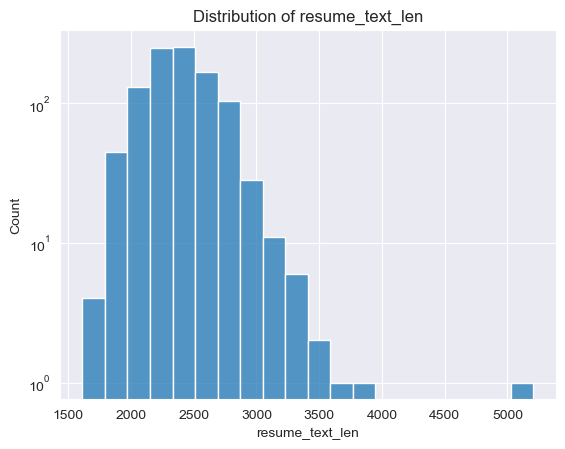

For Underwhelming:


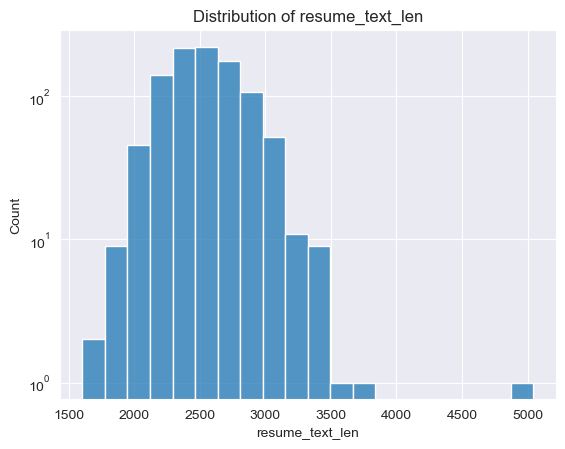

For Good Fit:


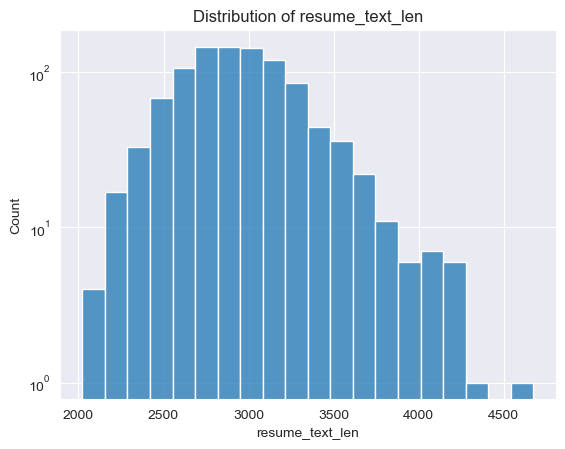

For Overqualified:


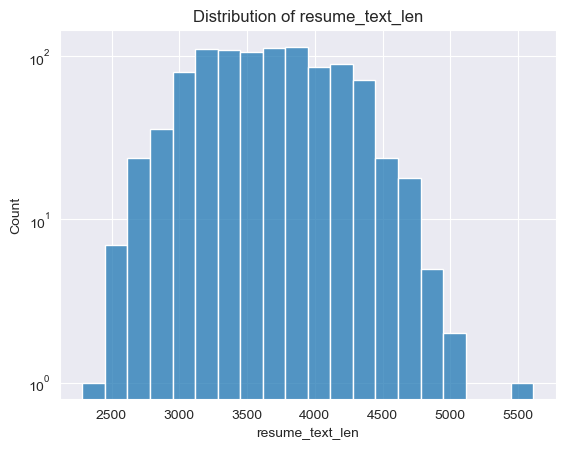

In [35]:
for i in df['category'].unique():
    print(f"For {i}:")
    plot_histogram(temp[temp['category'] == i], 'resume_text_len')

Observations:
- Most of the mismatch data belonged to healthcare background because of the example given in category requirements. (~180 of the 500 have the word patient or healthcare)
- Other categories seem to have robust synthetic data generations.
- Some text generations do not have either Projects or Work experience sections and only have skills listed. For this use case, the advantage is that we can re-label them as Bad fit category from their original label. However, adjusted the prompt for next set of generations.

In [36]:
# No projects or experience - category label must be "Bad fit"
cond1 = df['resume_text'].str.contains("Work Experience", case=False)
cond2 = df['resume_text'].str.contains("Experience", regex=False)
cond3 = df['resume_text'].str.contains("PROFESSIONAL EXPERIENCE", regex=False)
cond4 = df['resume_text'].str.contains("EXPERIENCE", regex=False)
cond5 = df['resume_text'].str.contains("Projects", regex=False)

In [37]:
special_cases1 = df[~(cond1 | cond2 | cond3 | cond4 | cond5)].copy()
special_cases1

,id,job_title,company,job_skills,job_summary,category,resume_text


## Modifying labels as Good fit/ Bad fit

In [38]:
df['label'] = df['category']

## Cosine similarity for text columns

In [39]:
def get_similarity_percentage(col_data, threshold=0.3):
    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(col_data)
    
    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    # Create a mask for the upper triangle (excluding diagonal)
    n = cosine_sim.shape[0]
    mask = np.triu(np.ones((n, n)), k=1).astype(bool)
    
    # Count pairs above threshold in upper triangle
    num_similar_pairs = np.sum(cosine_sim[mask] > threshold)
    
    # Total number of unique pairs
    total_unique_pairs = n * (n - 1) // 2
    
    # Calculate percentage
    percentage_instances = (num_similar_pairs / total_unique_pairs) * 100
    
    return percentage_instances

In [40]:
thresholds = np.arange(0, 1.1, 0.1)
for thresh in thresholds:
    print(f"Percentage of Job Resumes that are similar with each other (cosine similarity > {thresh}) are: ", get_similarity_percentage(df['resume_text'], thresh))

Percentage of Job Resumes that are similar with each other (cosine similarity > 0.0) are:  100.0
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.1) are:  59.400600150037505
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.2) are:  9.24316079019755
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.30000000000000004) are:  4.167704426106527
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.4) are:  2.305838959739935
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.5) are:  0.87335583895974
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.6000000000000001) are:  0.1912853213303326
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.7000000000000001) are:  0.038784696174043516
Percentage of Job Resumes that are similar with each other (cosine similarity > 0.8) are:  

## Eliminating possible fit category mentions in the synthetic data

In [41]:
print(df[df['resume_text'].str.contains("complete mismatch", case=False)].iloc[0]['resume_text'])

**Mrs. Diana Porter**

*Phone*: 555-555-5555 | *Email*: dianaporter@email.com | *LinkedIn*: linkedin.com/in/dianaporter

**Professional Summary**

Highly experienced professional with a career focus in the fashion industry, specializing in textile design and production management. Expert in managing teams, negotiating contracts, and driving process improvements. Proven track record of achieving cost savings and increasing efficiency in textile manufacturing.

**Skills**

*Primary Skills*: Textile Design, Production Management, Team Leadership, Contract Negotiation, Process Improvement

*Technical Competencies*: Adobe Illustrator, Photoshop, ERP Systems (e.g., SAP), Microsoft Office Suite

*Complementary Abilities*: Communication, Problem Solving, Organizational Skills, Project Management

**Education**

*Bachelor of Fine Arts in Textile Design*, *University of the Arts London*, 1995-1999

**Work Experience**

*Textile Design Manager*, *Fashion Forward Inc.*, Full-time, 2010-present

- 

In [42]:
# Function to remove lines containing a specific string (case-insensitive)
def remove_notes(text):
    final_text = []
    for line in text.split("\n"):
        if("note" in line.lower() and ":" in line.lower()):
            continue
        elif("truncated" in line.lower()):
            continue
        elif("word count" in line.lower()):
            continue
        else:
            final_text.append(line)
            
    return "\n".join(final_text)


def remove_last_line(text, index):
    final_text = []
    lines = text.split("\n")
    return "\n".join(lines[: index])

In [43]:
# Removing Notes metadata
df['resume_data'] = df['resume_text'].apply(lambda x: remove_notes(x))

# Removing metadata
for i in df[df['resume_data'].str.contains("underwhelming", case=False)].index:
    df.loc[i, 'resume_data'] = remove_last_line(df.loc[i, 'resume_data'], -4)

# Remove metadata
for i in df[df['resume_data'].str.contains("complete mismatch", case=False)].index:
     df.loc[i, 'resume_data'] = remove_last_line(df.loc[i, 'resume_data'], -2)
     
# Remove metadata
for i in df[df['resume_data'].str.contains("good fit", case=False)].index:
    df.loc[i, 'resume_data'] = remove_last_line(df.loc[i, 'resume_data'], -8)
    
# Remove Metadata
df.loc[91, 'resume_data'] = remove_last_line(df.loc[91, 'resume_data'], -6)
df.loc[579, 'resume_data'] = remove_last_line(df.loc[579, 'resume_data'], -4)
df.loc[735, 'resume_data'] = remove_last_line(df.loc[735, 'resume_data'], -2)
df.loc[1307, 'resume_data'] = remove_last_line(df.loc[1307, 'resume_data'], -2)
df.loc[1467, 'resume_data'] = remove_last_line(df.loc[1467, 'resume_data'], -2)
df.loc[3599, 'resume_data'] = remove_last_line(df.loc[1467, 'resume_data'], -2)

In [44]:
print(df[df['resume_data'].str.contains("overqualified", case=False)].shape)
print(df[df['resume_data'].str.contains("underqualified", case=False)].shape)
print(df[df['resume_data'].str.contains("good fit", case=False)].shape)
print(df[df['resume_data'].str.contains("complete mismatch", case=False)].shape)


(8, 9)
(0, 9)
(0, 9)
(0, 9)


In [45]:
df[df['resume_data'].str.contains("truncated", case=False)]

,id,job_title,company,job_skills,job_summary,category,resume_text,label,resume_data


In [46]:
df['job_data'] = df['job_title'] + '\n' + df['job_summary'] + '\n' + df['job_skills']

## Saving the data

In [47]:
required_data = df[['job_data', 'resume_data', 'label']].copy()
required_data.to_csv(f"{path}/data/synthetic_data/synthetic_data_v2/synthetic_data_v2.csv", index=False)